<a href="https://colab.research.google.com/github/thrinesh01/gradskey/blob/main/RMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.4 MB/s eta 0:00:00


In [ ]:
from faker import Faker

In [ ]:
import random
import pandas as pd
# Initialize Faker
fake = Faker()

# Define subjects
subjects = ["Electronics", "Mathematics", "DSA", "Programming", "Database", "Data Science"]

# Generate student data
students = []
for student_id in range(1, 10001):  # 10,000 students
    student_name = fake.name()  # Generate a fake name
    department = random.choice(["CSE", "ECE", "IT", "EEE"])  # Choose a random department
    year = random.randint(1, 4)  # Choose a random year (1st - 4th)

    # Generate marks for each subject (0 to 100)
    marks = {subject: random.randint(30, 100) for subject in subjects}

    # Create student dictionary
    student = {
        "Student_ID": student_id,
        "Name": student_name,
        "Department": department,
        "Year": year,
        **marks  # Unpacking marks dictionary
    }
    students.append(student)

# Convert to Pandas DataFrame
df = pd.DataFrame(students)

# Save to CSV
df.to_csv("students_data.csv", index=False)

print("Student data generated successfully!")

Student data generated successfully!


In [ ]:
import seaborn as sns

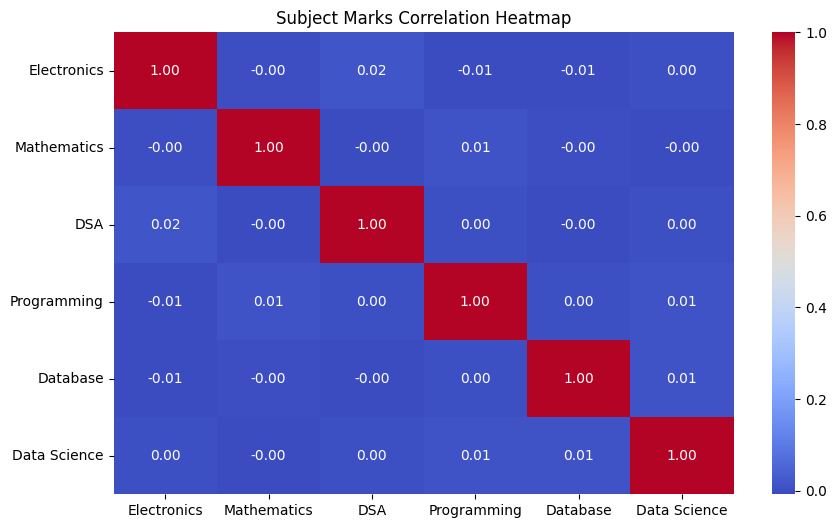

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(df[["Electronics", "Mathematics", "DSA", "Programming", "Database", "Data Science"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Subject Marks Correlation Heatmap")
plt.show()

In [ ]:
from multiprocessing import Pool

# Define subjects
subjects = ["Electronics", "Mathematics", "DSA", "Programming", "Database", "Data Science"]

def mapper(row):
    """
    Simulates the Mapper function by extracting subject marks
    """
    student_id = row["Student_ID"]
    output = []

    for subject in subjects:
        output.append((subject, row[subject]))  # Key-Value pairs (subject, marks)

    return output

# Apply the mapper function to all rows
with Pool() as pool:
    mapped_data = pool.map(mapper, [row for _, row in df.iterrows()])

# Flatten the mapped output
mapped_data = [item for sublist in mapped_data for item in sublist]

# Display sample output from the mapper
mapped_data[:10]  # First 10 key-value pairs

[('Electronics', 61),
 ('Mathematics', 41),
 ('DSA', 85),
 ('Programming', 87),
 ('Database', 97),
 ('Data Science', 55),
 ('Electronics', 37),
 ('Mathematics', 96),
 ('DSA', 32),
 ('Programming', 32)]

In [ ]:
# Define passing marks (e.g., 40)
import pandas as pd
passing_marks = 40


# Calculate pass and fail counts per subject
pass_fail_stats = pd.DataFrame({
    "Pass Count": (df[subjects] >= passing_marks).sum(),
    "Fail Count": (df[subjects] < passing_marks).sum()
})

# Calculate Pass Percentage
pass_fail_stats["Pass Percentage"] = (pass_fail_stats["Pass Count"] / len(df)) * 100

print(pass_fail_stats)

              Pass Count  Fail Count  Pass Percentage
Electronics         8560        1440            85.60
Mathematics         8599        1401            85.99
DSA                 8609        1391            86.09
Programming         8580        1420            85.80
Database            8532        1468            85.32
Data Science        8687        1313            86.87


In [ ]:
# List of subjects
subjects = ["Electronics", "Mathematics", "DSA", "Programming", "Database", "Data Science"]

# Compute the average marks per student
df["Average Marks"] = df[subjects].mean(axis=1)

# Display the first few rows to verify
print(df.head())

   Student_ID               Name Department  Year  Electronics  Mathematics  \
0           1       Olivia Evans        ECE     4           61           41   
1           2       James Wilson        CSE     4           37           96   
2           3  Robert Valenzuela        EEE     3           83           80   
3           4   Jennifer Buckley        EEE     1           32           78   
4           5     Jason Mckinney        EEE     2           96           53   

   DSA  Programming  Database  Data Science  Average Marks  
0   85           87        97            55      71.000000  
1   32           32        44            90      55.166667  
2   60           58        99            73      75.500000  
3   65           68        93            95      71.833333  
4   80           51        65            55      66.666667  


In [ ]:
from sklearn.linear_model import LinearRegression
# Define features (subject marks) and target (overall average)
X = df[["Electronics", "Mathematics", "DSA", "Programming", "Database", "Data Science"]]
y = df["Average Marks"]

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get regression coefficients
coefficients = pd.DataFrame({
    "Subject": X.columns,
    "Coefficient": model.coef_
})
print(coefficients)

        Subject  Coefficient
0   Electronics     0.166667
1   Mathematics     0.166667
2           DSA     0.166667
3   Programming     0.166667
4      Database     0.166667
5  Data Science     0.166667


In [ ]:
# Top 10 Students
top_students = df.nlargest(10, "Average Marks")
# Bottom 10 Students
bottom_students = df.nsmallest(10, "Average Marks")

print("Top 10 Students:\n", top_students[["Student_ID", "Average Marks"]])
print("\nBottom 10 Students:\n", bottom_students[["Student_ID", "Average Marks"]])

Top 10 Students:
       Student_ID  Average Marks
4703        4704      92.333333
8969        8970      91.333333
2682        2683      91.166667
914          915      90.666667
6212        6213      90.333333
7597        7598      90.166667
9181        9182      90.000000
878          879      89.666667
4006        4007      89.333333
6401        6402      89.166667

Bottom 10 Students:
       Student_ID  Average Marks
5980        5981      35.666667
4767        4768      36.000000
9952        9953      38.000000
683          684      38.500000
1607        1608      39.833333
5861        5862      40.166667
8617        8618      40.500000
145          146      40.833333
8888        8889      41.000000
6523        6524      41.166667


count    10000.000000
mean         6.496113
std          0.839024
min          3.566667
25%          5.916667
50%          6.500000
75%          7.083333
max          9.233333
Name: CGPA, dtype: float64


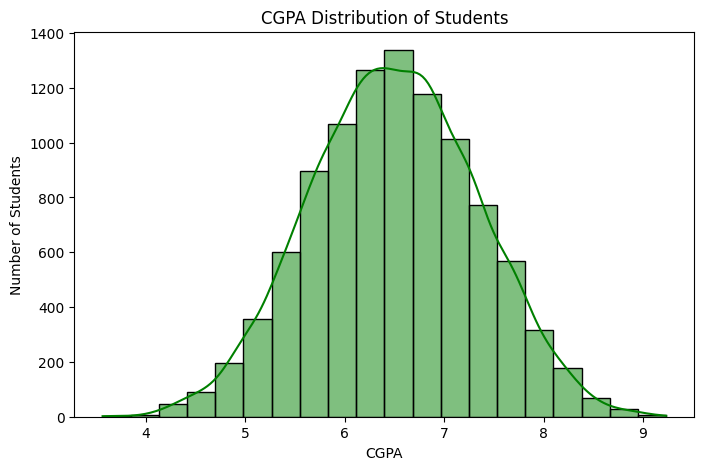

In [ ]:
# Convert marks (out of 100) to CGPA (out of 10)
df["CGPA"] = df[subjects].mean(axis=1) / 10

# Display summary statistics
print(df["CGPA"].describe())

# Visualizing CGPA Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["CGPA"], bins=20, kde=True, color="green")
plt.xlabel("CGPA")
plt.ylabel("Number of Students")
plt.title("CGPA Distribution of Students")
plt.show()